# Analysis Mainly done in Tableau: https://public.tableau.com/app/profile/matt.colville#!/

## Project Showing defensive catcher metrics and who at this time was the best defensive catcher

In [248]:
from pybaseball import batting_stats, playerid_reverse_lookup, playerid_lookup, statcast_batter, spraychart, player_search_list
from pybaseball.lahman import *
import pandas as pd
import numpy as np

In [151]:
framing_2022 = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\exploratory data files\catcher\catcher-framing.csv")

In [152]:
framing_2022 = framing_2022.drop(labels=0, axis=0)

In [153]:
framing_2022["Name"] = framing_2022["first_name"] + " " + framing_2022["last_name"]

In [154]:
framing_2022["runs_rank"] = framing_2022["runs_extra_strikes"].rank(ascending = False)
framing_2022["strike_rank"] = framing_2022["strike_rate"].rank(ascending = False)

In [155]:
framing_2022["corner_strike_rate"] = framing_2022[['strike_rate_11', 'strike_rate_13', 'strike_rate_17', 'strike_rate_19']].mean(axis = 1)
framing_2022["nc_strike_rate"] = framing_2022[['strike_rate_12', 'strike_rate_14', 'strike_rate_16', 'strike_rate_18']].mean(axis = 1)
framing_2022["corner_rank"] = framing_2022["corner_strike_rate"].rank(ascending = False)
framing_2022["nc_rank"] = framing_2022["nc_strike_rate"].rank(ascending = False)
frame2= framing_2022[["Name","nc_strike_rate", "corner_strike_rate", "runs_extra_strikes", "strike_rate", 'strike_rate_11', 'strike_rate_12',
       'strike_rate_13', 'strike_rate_14', 'strike_rate_16', 'strike_rate_17',
       'strike_rate_18', 'strike_rate_19']]

In [156]:
pop = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\exploratory data files\catcher\poptime.csv")
pop_final = pop[["catcher", "maxeff_arm_2b_3b_sba", "exchange_2b_3b_sba", "pop_2b_sba"]]
defense = pop_final.merge(frame2, left_on = "catcher", right_on= "Name", how = 'right')

In [157]:
defense.to_excel(r"C:\Users\Owner\OneDrive\Desktop\exploratory data files\catcher\defense.xlsx")

In [158]:
defense.corr()

,maxeff_arm_2b_3b_sba,exchange_2b_3b_sba,pop_2b_sba,nc_strike_rate,corner_strike_rate,runs_extra_strikes,strike_rate,strike_rate_11,strike_rate_12,strike_rate_13,strike_rate_14,strike_rate_16,strike_rate_17,strike_rate_18,strike_rate_19
maxeff_arm_2b_3b_sba,1.000000,0.300907,-0.603613,-0.246743,-0.000948,-0.146368,-0.210646,0.158539,-0.062899,-0.012815,0.023045,-0.198857,0.017639,-0.215581,-0.158004
exchange_2b_3b_sba,0.300907,1.000000,0.414622,-0.058398,0.068744,-0.039061,-0.097853,0.035746,0.152859,0.176643,-0.085357,-0.102984,0.034556,-0.099368,-0.136133
pop_2b_sba,-0.603613,0.414622,1.000000,0.181725,-0.075571,0.066550,0.094379,-0.107659,0.194092,0.019097,-0.052430,0.033840,-0.108269,0.134509,0.051972
nc_strike_rate,-0.246743,-0.058398,0.181725,1.000000,0.475788,0.728195,0.862245,0.080361,0.447548,0.270667,0.358386,0.579515,0.171878,0.561468,0.444648
corner_strike_rate,-0.000948,0.068744,-0.075571,0.475788,1.000000,0.578335,0.688461,0.367620,0.077356,0.575738,0.218655,0.328620,0.625650,0.315905,0.424997
runs_extra_strikes,-0.146368,-0.039061,0.066550,0.728195,0.578335,1.000000,0.827211,0.177696,0.132931,0.122435,0.346163,0.471245,0.376914,0.486543,0.516530
strike_rate,-0.210646,-0.097853,0.094379,0.862245,0.688461,0.827211,1.000000,0.150083,0.120517,0.188309,0.292920,0.583004,0.406159,0.683821,0.671294
strike_rate_11,0.158539,0.035746,-0.107659,0.080361,0.367620,0.177696,0.150083,1.000000,0.126996,0.163312,0.273281,0.028770,-0.098580,-0.221929,-0.201287
strike_rate_12,-0.062899,0.152859,0.194092,0.447548,0.077356,0.132931,0.120517,0.126996,1.000000,0.441691,0.010136,0.080084,-0.238034,-0.252064,-0.200594
strike_rate_13,-0.012815,0.176643,0.019097,0.270667,0.575738,0.122435,0.188309,0.163312,0.441691,1.000000,-0.004632,0.193736,0.033294,-0.106764,-0.133275


In [159]:
name_list = list(defense["Name"])
bat = batting_stats(2022, qual = 0)

## Offensive Hitting Catcher metrics

In [191]:
bat_catch = bat.query('Name in @name_list')
list(bat_catch.columns)

['IDfg',
 'Season',
 'Name',
 'Team',
 'Age',
 'G',
 'AB',
 'PA',
 'H',
 '1B',
 '2B',
 '3B',
 'HR',
 'R',
 'RBI',
 'BB',
 'IBB',
 'SO',
 'HBP',
 'SF',
 'SH',
 'GDP',
 'SB',
 'CS',
 'AVG',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Pitches',
 'Balls',
 'Strikes',
 'IFH',
 'BU',
 'BUH',
 'BB%',
 'K%',
 'BB/K',
 'OBP',
 'SLG',
 'OPS',
 'ISO',
 'BABIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'wOBA',
 'wRAA',
 'wRC',
 'Bat',
 'Fld',
 'Rep',
 'Pos',
 'RAR',
 'WAR',
 'Dol',
 'Spd',
 'wRC+',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'phLI',
 'PH',
 'WPA/LI',
 'Clutch',
 'FB% (Pitch)',
 'FBv',
 'SL%',
 'SLv',
 'CT%',
 'CTv',
 'CB%',
 'CBv',
 'CH%',
 'CHv',
 'SF%',
 'SFv',
 'KN%',
 'KNv',
 'XX%',
 'PO%',
 'wFB',
 'wSL',
 'wCT',
 'wCB',
 'wCH',
 'wSF',
 'wKN',
 'wFB/C',
 'wSL/C',
 'wCT/C',
 'wCB/C',
 'wCH/C',
 'wSF/C',
 'wKN/C',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%',
 'F-Strike%',
 'SwStr%',
 'BsR',
 'FA% (sc)',
 

In [192]:
MLB_teams = pd.read_excel(r"C:\Users\Owner\OneDrive\Desktop\exploratory data files\MLB Mapping file.xlsx")
final_bat = bat_catch.merge(MLB_teams, left_on = "Team", right_on = "Team_ID")
final_bat = final_bat[['Name', 'Age', 'AVG', 'AB', 'PA', 'HR', 'RBI', 'SO', 'K%', 'OPS', 'BB%', 'ISO+', 'LD%', 'BABIP','GB%', 'FB%', 'O-Swing%', 'Z-Contact%', 'O-Contact%', 'wOBA', 'WAR', 'wRC+', 'Def', 'Pull%', 'Cent%', 'Oppo%', 'CStr%', 'Division', 'League', 'SwStr%', 'Soft%', 'Hard%', 'Med%', 'EV', 'HardHit%', 'LA']]
final_data= final_bat.merge(defense, left_on = "Name", right_on = "Name")

# All star catchers

In [193]:
a_s = all_star_full().groupby("playerID").count()
a_s.reset_index(inplace= True)
players = playerid_reverse_lookup(ls, key_type = 'bbref')
as_players= a_s.merge(players, left_on = 'playerID', right_on = 'key_bbref')
as_players['Name'] = as_players['name_first'] + " " + as_players['name_last']
as_players['Name'] = as_players['Name'].str.title()
final_as = as_players[['yearID', 'Name']]
final_data2 = final_as.merge(final_data, left_on = 'Name', right_on = 'Name', how = 'right')
final_data2['yearID'] = final_data2['yearID'].fillna(0)
final_data2.to_excel(r"C:\Users\Owner\OneDrive\Desktop\exploratory data files\catcher\catcher_data.xlsx", index= False)

## Any Correlation between offensive or defensive metrics

In [187]:
correlation = final_data2.corr().abs().stack().reset_index()
correlation.columns = ['FEATURE_1', 'FEATURE_2', 'Cor']
mask_dups = (correlation[['FEATURE_1', 'FEATURE_2']].apply(frozenset, axis=1).duplicated()) | (correlation['FEATURE_1']==correlation['FEATURE_2']) 
df_corr = correlation[~mask_dups]
df_corr.query('Cor >= .75')

,FEATURE_1,FEATURE_2,Cor
105,AVG,OPS,0.846465
108,AVG,BABIP,0.775559
114,AVG,wOBA,0.846063
116,AVG,wRC+,0.827873
148,AB,PA,0.995285
150,AB,RBI,0.855622
151,AB,SO,0.769397
198,PA,RBI,0.857362
199,PA,SO,0.760521
246,HR,RBI,0.831505


# Alejandro Kirk Deep dive
### Spray Chart and stat cast analysis

In [195]:
playerid_lookup('kirk')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,kirk,alejandro,672386,kirka001,kirkal01,22581,2020.0,2022.0
1,kirk,bill,117117,kirkb101,kirkbi01,1006966,1961.0,1961.0
2,kirk,tom,117116,kirkt101,kirkto01,1006971,1947.0,1947.0


Gathering Player Data


C:\Users\Owner\anaconda3\lib\site-packages\pybaseball\plotting.py:114: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sub_data = sub_data[sub_data['events'].notna()][sub_data['hc_x'].notna()][sub_data['hc_y'].notna()]


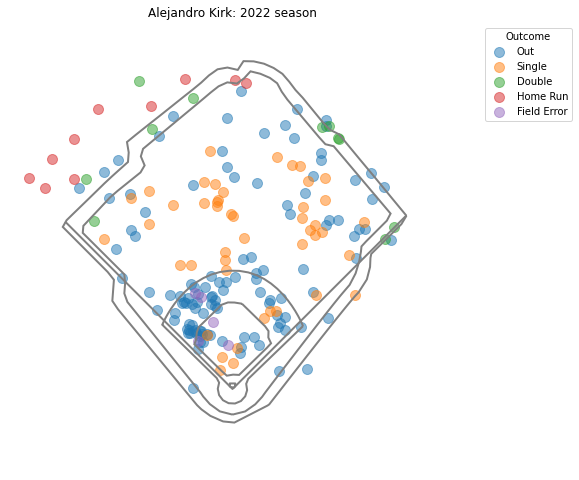

In [264]:
data = statcast_batter('2022-04-07', '2022-07-01', 672386)
ls2 = list(['field_out', 'grounded_into_double_play', 'fielders_choice_out', 'sac_fly', 'force_out'])
data['events'] = np.where(data['events'].isin(ls2), 'out', data['events'])
spraychart(data, 'astros', title='Alejandro Kirk: 2022 season')

In [291]:
data['woba'] = data['woba_value']/data['woba_denom']
kirk_stats = data[["pitch_type", "player_name", "zone", "release_speed", "events", "p_throws", "outs_when_up", "game_pk", "woba", "babip_value", "iso_value"]]
kirk_stats = kirk_stats.rename(columns = {'woba': 'woba_value'})
kirk_stats.to_excel(r"C:\Users\Owner\OneDrive\Desktop\exploratory data files\catcher\kirk_statcast.xlsx")
data.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [258]:
players2 = framing_2022[["last_name", "first_name"]]
ls2 = list(players2.itertuples(index=False, name=None))
cat_list = player_search_list(ls2)
id_list = list(cat_list["key_mlbam"])
kirk_stats

,pitch_type,player_name,zone,release_speed,events,p_throws,outs_when_up,game_pk,woba_value,babip_value,iso_value
12,SI,"Kirk, Alejandro",8,87.9,single,L,0,661726,0.90,1.0,0.0
40,SI,"Kirk, Alejandro",11,90.8,single,R,0,661728,0.90,1.0,0.0
42,CH,"Kirk, Alejandro",9,80.5,double,R,1,661740,1.25,1.0,1.0
55,SI,"Kirk, Alejandro",3,95.5,single,R,0,661206,0.90,1.0,0.0
84,CU,"Kirk, Alejandro",4,79.5,single,R,2,661190,0.90,1.0,0.0
85,SI,"Kirk, Alejandro",8,94.1,single,R,1,661190,0.90,1.0,0.0
99,SI,"Kirk, Alejandro",6,95.0,single,R,0,661190,0.90,1.0,0.0
113,FF,"Kirk, Alejandro",2,94.0,single,R,1,661457,0.90,1.0,0.0
208,CH,"Kirk, Alejandro",6,87.4,single,R,1,661743,0.90,1.0,0.0
222,FC,"Kirk, Alejandro",4,89.1,single,R,2,661743,0.90,1.0,0.0
